In [1]:
import os
import numpy as np
from PIL import Image
import matplotlib
import matplotlib.pyplot as plt

# DATASET

In [2]:
eyewear_encode = {'open': 0, "sunglasses":1}

In [3]:
# Training Data
train_files =list(map(lambda x: os.path.join("TrainingSet/",x ),os.listdir("TrainingSet")))

X_train = []
y_train = []

for i in train_files:
    if i.endswith(".jpg"):
        eyewear = eyewear_encode[i.split("/")[1].split("_")[3].strip(".jpg")]
        y_train.append(eyewear)
        m = np.asarray(Image.open(i)).flatten()
        X_train.append(m)
        
# Test Data
test_files =list(map(lambda x: os.path.join("TestSet/",x ), os.listdir("TestSet/")))

X_test = []
y_test = []

for i in test_files:
    if i.endswith(".jpg"):
        eyewear = eyewear_encode[i.split("/")[1].split("_")[3].strip(".jpg")]
        y_test.append(eyewear)
        m = np.asarray(Image.open(i)).flatten()
        X_test.append(m)
        
X_train = np.array(X_train)
y_train = np.array(y_train)

X_test = np.array(X_test)
y_test = np.array(y_test)

# DECISION TREE

## part a

In [19]:
from sklearn.tree import DecisionTreeClassifier

#Defining the desicion tree
decision_tree = DecisionTreeClassifier(max_depth=2, random_state=0)
decision_tree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [20]:
from sklearn.metrics import accuracy_score

#Getting the acc scores
train_predict = decision_tree.predict(X_train)
test_predict = decision_tree.predict(X_test)

train_acc = accuracy_score(y_train, train_predict)
test_acc = accuracy_score(y_test, test_predict)

In [21]:
# DON'T REMOVE THIS CELL
print(train_acc)
print(test_acc)

0.7111111111111111
0.45555555555555555


## part b

__Did your model performs well? Is bias low or high? What about variance?__

My model performed terribly bad. Bias is low, variance is high. Since it has max depth = 2, model is not complicated. It performs good on training but bad at test or any other unseen data.

# BAGGING MODELS

## part c

In [73]:
from sklearn.ensemble import BaggingClassifier

#Train bagging with train samples intact but features sampled without bootstap.
bagging_clf1 = BaggingClassifier(
    DecisionTreeClassifier(max_depth=2, random_state=0),
    max_features=40,bootstrap= False, bootstrap_features=False, n_jobs=-1, random_state=0)

bagging_clf1.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
         bootstrap=False, bootstrap_features=False, max_features=40,
         max_samples=1.0, n_estimators=10, n_jobs=-1, oob_score=False,
         random_state=0, verbose=0, warm_start=False)

## part d

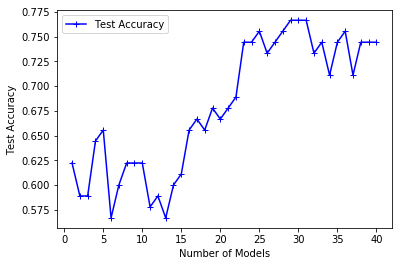

In [74]:
#Quick note: I copied this plotting functions from my previous homework for referance you can check it.

def plotting(X,Y,X_test,Y_test):    
    test_score_dict = {}
    plt.figure()
    plt.xlabel("Number of Models")
    plt.ylabel("Test Accuracy")
    #Checking for 40 different estimators.
    for i in range (1, 41):
        model = BaggingClassifier(
    DecisionTreeClassifier(max_depth=2, random_state=0),n_estimators = i,
    max_features=40,bootstrap= False ,bootstrap_features=False, n_jobs=-1, random_state=0)
        
        model.fit(X,Y)
    
        testpredict = model.predict(X_test)
        test_accuracy = accuracy_score(Y_test, testpredict)
        test_score_dict[i] = test_accuracy

        
    
    testlist = sorted(test_score_dict.items())
    
    b1, b2 = zip(*testlist)
    
    
    plt.plot(b1, b2, '+-', color="b",
             label="Test Accuracy")
    
    plt.legend(loc="best")
    return plt

        
        
        
plotting(X_train,y_train,X_test,y_test)
plt.show()

## part e

__What is the best number for the number of models in your model? (If there are several best numbers with same accuracy, report the highest number). Calculate train and test accuracy of the bagging model  which has the best number of models.__

Best numbers are 29,30,31. We can say the highest is 31.

In [118]:
#Setting up the new model with best params.
bagging_clf_updated = BaggingClassifier(
    DecisionTreeClassifier(max_depth=2, random_state=0),n_estimators=31,
    max_features=40,bootstrap= False ,bootstrap_features=False, n_jobs=-1, random_state=0)

bagging_clf_updated.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
         bootstrap=False, bootstrap_features=False, max_features=40,
         max_samples=1.0, n_estimators=31, n_jobs=-1, oob_score=False,
         random_state=0, verbose=0, warm_start=False)

In [119]:
#Getting the scores
train_predict1 = bagging_clf_updated.predict(X_train)
test_predict1 = bagging_clf_updated.predict(X_test)

train_acc = accuracy_score(y_train, train_predict1)
test_acc = accuracy_score(y_test, test_predict1)

In [120]:
# DON'T REMOVE THIS CELL
print(train_acc)
print(test_acc)

0.9111111111111111
0.7666666666666667


## part f

__Compare the decision tree classifier in part a and best bagging classifier in part e in terms of accuracy, bias, and variance.__

Best bagging model is absolutely better. Again it has problems with itself, training and test acc. are so different that we can say it has some problems in itself. Accuracy is somewhat acceptable, this model is closer to Optimum Model Complexity(OMC) than part a's model. Variance is lower since bagging always does that and bias is probably around the same levels. 

## part g

In [121]:
#New bagging with train instances are bootstrapped, features are still not bootsrapped.
bagging_clf2 = BaggingClassifier(
    DecisionTreeClassifier(max_depth=2, random_state=0),
    max_features=40,bootstrap= True, bootstrap_features=False, n_jobs=-1, random_state=0)

bagging_clf2.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=40,
         max_samples=1.0, n_estimators=10, n_jobs=-1, oob_score=False,
         random_state=0, verbose=0, warm_start=False)

## part h

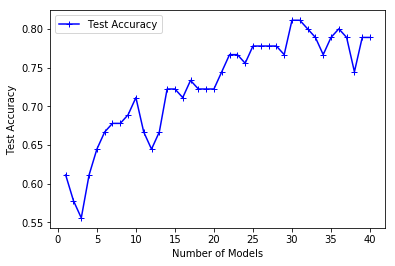

In [131]:
# PLOT
def plotting2(X,Y,X_test,Y_test):    
    test_score_dict = {}
    plt.figure()
    plt.xlabel("Number of Models")
    plt.ylabel("Test Accuracy")
    for i in range (1, 41):
        model = BaggingClassifier(
    DecisionTreeClassifier(max_depth=2, random_state=0),n_estimators = i,
    max_features=40,bootstrap= True ,bootstrap_features=False, n_jobs=-1, random_state=0)
        
        model.fit(X,Y)
    
        testpredict = model.predict(X_test)
        test_accuracy = accuracy_score(Y_test, testpredict)
        test_score_dict[i] = test_accuracy

        
    
    testlist = sorted(test_score_dict.items())
    
    b1, b2 = zip(*testlist)
    
    
    plt.plot(b1, b2, '+-', color="b",
             label="Test Accuracy")
    
    plt.legend(loc="best")
    return plt

        
        
        
plotting2(X_train,y_train,X_test,y_test)
plt.show()

## part i

__What is the best number for the number of models in your model? (If there are several best numbers with same accuracy, report the highest number). Calculate train and test accuracy of the bagging model which has the best number of models.__

Best numbers are 30,31. We can say the highest is 31.

In [125]:
#Setting up the new model with best params.
bagging_clf2_updated = BaggingClassifier(
    DecisionTreeClassifier(max_depth=2, random_state=0),n_estimators=31,
    max_features=40,bootstrap= True ,bootstrap_features=False, n_jobs=-1, random_state=0)

bagging_clf2_updated.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=40,
         max_samples=1.0, n_estimators=31, n_jobs=-1, oob_score=False,
         random_state=0, verbose=0, warm_start=False)

In [126]:
#Getting the scores
train_predict2 = bagging_clf2_updated.predict(X_train)
test_predict2 = bagging_clf2_updated.predict(X_test)

train_acc = accuracy_score(y_train, train_predict2)
test_acc = accuracy_score(y_test, test_predict2)

In [127]:
# DON'T REMOVE THIS CELL
print(train_acc)
print(test_acc)

0.8793650793650793
0.8111111111111111


## part j

__Compare the decision tree classifier in part a and best bagging classifier in part i in terms of accuracy, bias, and variance.__

When we compare two models with results of accuracy, the winner is clearly Part I's bagging classifier. In terms of bias and variance there is again similar trade-off that result of bagging. Our new model is lowered down the variance even more with making bias higher than before.

## part k

__Compare two bagging models that you found in part e and part i in terms of accuracy, bias, and variance.__

Second bagging models have the acc numbers of (87,81) and the first one had (91,76) so the winner is clearly second one aka part I's model. It solved the issue that first model had with bootstraping the train sample data and got the winner medal. If we talk about bias and variance I think a ranking between part a, part i, and part e will help us understanding. Part a had low bias, high variance so we need to tune up bias and down variance. After first "try" we achieved less variance and slightly high bias at part e. Finally for part i, we really got close to Optimum Model Complexity with making variance even lover and bias higher. So the ordering with respect to better OMC is Part i > Part e > part a

## part l

__How sampling features and sampling instances affected the performance of your model? Why?__

As I mentioned at part K, sampling instances made our model less overfit, actually almost none for out tries. For sampling features again we made all our models in bagging indipendent so all the desicions they made are indipendent from each other and that gave us the good fit to our both train and test data.

# BOOSTING MODELS

## part m

In [130]:
from sklearn.ensemble import AdaBoostClassifier

#Defininig adaboost.
adaboost_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=2, random_state=0), random_state=0)

adaboost_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=0)

## part n

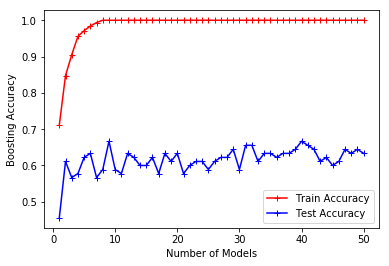

In [137]:
# PLOT

def plotting3(X,y,X_test,y_test):
    train_score_dict = {}
    test_score_dict = {}
    plt.figure()
    plt.xlabel("Number of Models")
    plt.ylabel("Boosting Accuracy")
    for i in range (1, 51):
        model = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=2, random_state=0),n_estimators=i ,random_state=0)
        
        model.fit(X,y)
        
        trainpredict = model.predict(X)
        train_accuracy = accuracy_score(y, trainpredict)
        train_score_dict[i] = train_accuracy
        
        testpredict = model.predict(X_test)
        test_accuracy = accuracy_score(y_test, testpredict)
        test_score_dict[i] = test_accuracy        
    
    trainlist = sorted(train_score_dict.items())
    testlist = sorted(test_score_dict.items())
    
    a1, a2 = zip(*trainlist)
    b1, b2 = zip(*testlist)
    
    plt.plot(a1, a2, '+-', color="r",
             label="Train Accuracy")
    plt.plot(b1, b2, '+-', color="b",
             label="Test Accuracy")
    
    plt.legend(loc="best")
    return plt
        
plotting3(X_train,y_train,X_test,y_test)
plt.show()

## part o

__What is the best number for the number of models in your model? (If there are several best numbers with same accuracy, report the highest number). Report train and test accuracy of the boosting model which has the best number of models.__

Best numbers are 9, 40. Highest is 40

In [149]:
#Setting up the new model with best params.

adaboost_clf_updated = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=2, random_state=0),n_estimators= 40,random_state=0)

adaboost_clf_updated.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
          learning_rate=1.0, n_estimators=40, random_state=0)

In [150]:
#Getting the scores.
train_predict_ada = adaboost_clf_updated.predict(X_train)
test_predict_ada = adaboost_clf_updated.predict(X_test)

train_acc = accuracy_score(y_train, train_predict_ada)
test_acc = accuracy_score(y_test, test_predict_ada)

In [151]:
# DON'T REMOVE THIS CELL
print(train_acc)
print(test_acc)

1.0
0.6666666666666666


# STACKING

## part p

In [4]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

#Defining SVC and Logregression with params given in pdf.
log_clf = LogisticRegression(random_state=0, solver="saga", C = 0.001, penalty= "l2")
svc_clf = SVC(random_state=0, C= 0.1, decision_function_shape = "ovo",kernel="poly",tol=0.0001, probability= True)

In [5]:
from sklearn.model_selection import train_test_split

#Splitting the train set
train_set_1, train_set_2, train_y_1, train_y_2 = train_test_split(X_train, y_train, test_size=0.5, random_state=0)

In [6]:
# DON'T REMOVE THIS CELL
print(sum(train_set_1))
print(sum(train_set_2))
print(sum(train_y_1))
print(sum(train_y_2))

[ 39  22  18 ... 187 162 252]
[159  67 238 ... 233  35  90]
78
80


In [9]:
#Training the log_clf
log_clf.fit(train_set_1,train_y_1)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='saga',
          tol=0.0001, verbose=0, warm_start=False)

In [10]:
#Training the svm_clf
svc_clf.fit(train_set_1,train_y_1)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovo', degree=3, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=True, random_state=0,
  shrinking=True, tol=0.0001, verbose=False)

## part q

In [11]:
log_prob = log_clf.predict_proba(train_set_2)
svc_prob = svc_clf.predict_proba(train_set_2)

#Here i wrote a list merger function for common probability list that wanted us at part q.
def listmerger (X,Y):
    m = []
    if len(X) == len(Y):
        for i in range(len(X)):
            l = []
            if len(X[i]) == len(Y[i]):
                l.append(X[i][0])
                l.append(Y[i][0])
            m.append(l)
    return m
            
            
new_train_set_2 = listmerger(log_prob,svc_prob)

In [12]:
from sklearn.ensemble import RandomForestClassifier

#Defining blender with params given at pdf.
blender = RandomForestClassifier(random_state = 0, max_depth=1, n_estimators=10)

blender.fit(new_train_set_2,train_y_2)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=1, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [27]:
# DON'T REMOVE THIS CELL
sum(np.array(new_train_set_2))

array([77.98288456, 81.73200044])

## part r

In [76]:
#Creating the probabilitated test set and merging them with function defined above.
log_prob_test = log_clf.predict_proba(X_test)
svc_prob_test = svc_clf.predict_proba(X_test)

new_test_set = listmerger(log_prob_test,svc_prob_test)

In [68]:
from sklearn.metrics import f1_score
blender_pred = blender.predict(new_test_set)
#Testing blender and getting the scores.

test_acc = accuracy_score(y_test, blender_pred)
test_f1 = f1_score(y_test, blender_pred)

In [69]:
# DON'T REMOVE THIS CELL
print("\nTest Scores:")
print(test_acc)
print(test_f1)


Test Scores:
0.8111111111111111
0.8045977011494252


__Did stacking model perform well?__

Stacking model performed around %80 percent. It realy performed well. Almost same results with part i.